In [1]:
import random

import matplotlib.pyplot as plt
from albumentations import (
    Compose, RandomBrightness, JpegCompression, HueSaturationValue, RandomContrast, HorizontalFlip,
    Rotate, VerticalFlip, Crop, PixelDropout, CropAndPad, RandomBrightnessContrast
)
import config
import paths
import randomness
from cnn_builder import *
from config import *
from dataset_functions import *
from functools import partial
from hypercube_set import HypercubeSet
from hypercube_loader import *
import numpy as np
import random
import randomness
import rendering
import training_history

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
os.chdir(os.getcwd().split("jupyter")[0])

inf = 2e32

%load_ext autoreload
%autoreload 2
%pylab inline

read_json_config(paths.config_file, network_type=None)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\allopezr\Documents\GitHub\VineyardUAVClassification\venv\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning:

pylab import has clobbered these variables: ['random', 'copy', 'shuffle', 'inf']
`%matplotlib` prevents importing * from pylab and numpy



In [2]:
font_mapping = {'family': 'Palatino Linotype', 'weight': 'normal', 'size': 11}
plt.rc('font', **font_mapping)

Max class: 0
Class 0: 111221
Class 1: 44735
Class 2: 22753
Class 3: 10287
Class 4: 5353
Class 5: 1200
Class 6: 4533
Class 7: 5903
Class 8: 17978
Class 9: 9469
Class 10: 10516
Class 11: 16911
Class 12: 3679
Class 13: 9116
Class 14: 18560
Class 15: 1136
Class 16: 75401
Hypercube shape: (1217, 303, 274)
{0: 0, 10: 1, 14: 2, 1: 3, 7: 4, 11: 5, 8: 6, 2: 7, 13: 8, 15: 9, 16: 10, 3: 11, 9: 12, 6: 13, 4: 14, 12: 15, 5: 16}


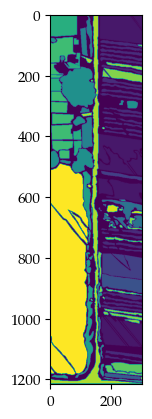

Min: 0.0, Max: 22.469980239868164, Size: (1217, 303, 274)
Max class: 0


In [10]:
hc_umat, max_class = load_umat(folder='media/public/HanChuan/', plot_hc=False, plot_mask=True)
hc_umat.print_metadata()
print("Max class: " + str(max_class))

In [11]:
hc_set = HypercubeSet([hc_umat])
hc_set.print_num_samples()

Number of samples per class:
Class 0: 111221
Class 1: 10516
Class 2: 18560
Class 3: 44735
Class 4: 5903
Class 5: 16911
Class 6: 17978
Class 7: 22753
Class 8: 9116
Class 9: 1136
Class 10: 75401
Class 11: 10287
Class 12: 9469
Class 13: 4533
Class 14: 5353
Class 15: 3679
Class 16: 1200


In [12]:
hc_set.identify_ground_samples()
hc_set.split_hypercubes(test_percentage=config.test_split)
hc_set.standardize(num_features=config.num_target_features, selection_method=LayerSelectionMethod.FACTOR_ANALYSIS)

Train size: 218900, Test size: 38630
|████████████████████████████████████████| 4/4 [100%] in 48.6s (0.06/s)                                                 


(FactorAnalysis(n_components=40, random_state=42), StandardScaler())

In [13]:
num_classes = hc_set.get_num_classes() - 1
img_shape = (config.patch_size, config.patch_size, config.num_target_features)